# Library import

In [21]:
# 필요한 라이브러리 설치
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import sklearn
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
import missingno as msno
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import OrderedDict
import math

# read_csv (6 Label)

In [22]:
Sdf = pd.read_csv('Sdf_6label.csv')
Kdf = pd.read_csv('Kdf_6label.csv')
Mdf = pd.read_csv('Mdf_6label.csv')

# X, y 나누기

In [23]:
Mx = Mdf.drop(labels=['bankruptcy'], axis=1)
My = Mdf['bankruptcy'].to_frame()
Mx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


In [24]:
Kx = Kdf.drop(labels=['bankruptcy'], axis=1)
Ky = Kdf['bankruptcy'].to_frame()
Kx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


In [25]:
Sx = Sdf.drop(labels=['bankruptcy'], axis=1)
Sy = Sdf['bankruptcy'].to_frame()
Sx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr54,attr55,attr56,attr57,attr58,attr59,attr61,attr62,attr63,attr64
0,0.200550,0.37951,0.396410,2.0472,32.3510,0.388250,0.249760,1.33050,1.13890,0.50494,...,2.2480,348690.0000,0.121960,0.397180,0.87804,0.001924,5.1372,82.658,4.4158,7.42770
1,0.081483,0.30734,0.458790,2.4928,51.9520,0.149880,0.092704,1.86610,1.05710,0.57353,...,2.4524,20545.0000,0.054015,0.142070,0.94598,0.000000,3.6147,86.435,4.2228,5.54970
2,0.187320,0.61323,0.229600,1.4063,-7.3128,0.187320,0.187320,0.63070,1.15590,0.38677,...,2.1184,3186.6000,0.134850,0.484310,0.86515,0.124440,4.3158,127.210,2.8692,7.89800
3,0.009020,0.63202,0.053735,1.1263,-37.8420,0.000000,0.014434,0.58223,1.33320,0.36798,...,0.9476,1.1263,0.180110,0.024512,0.84165,0.340940,4.2382,116.500,3.1330,2.56030
4,-0.027117,0.11148,0.119890,2.0754,-31.6430,-0.084883,-0.024300,7.67410,0.90732,0.85551,...,1.1130,1366.5000,-0.102140,-0.031697,1.10210,0.000000,13.4610,76.732,4.7568,0.68991


# Oversampling 진행

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

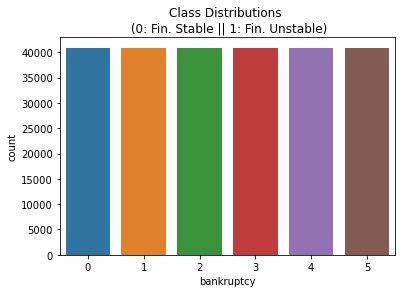

In [26]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Mdf, My = smote.fit_resample(Mx, My)

sns.countplot(x=My['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

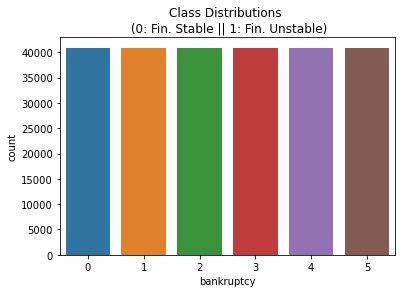

In [27]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Kdf, Ky = smote.fit_resample(Kx, Ky)

sns.countplot(x=Ky['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

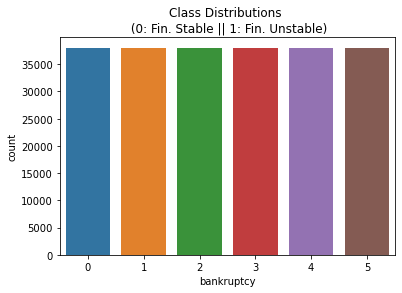

In [28]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Sdf, Sy = smote.fit_resample(Sx, Sy)

sns.countplot(x=Sy['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

# train_test_split

In [29]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
Mx_train, Mx_test, My_train, My_test = train_test_split(Mdf, My,test_size=0.3,random_state=2022)

In [30]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
Kx_train, Kx_test, Ky_train, Ky_test = train_test_split(Kdf, Ky,test_size=0.3,random_state=2022)

In [31]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
Sx_train, Sx_test, Sy_train, Sy_test = train_test_split(Sdf, Sy,test_size=0.3,random_state=2022)

# Modeling - RanodomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier
Mforest = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=256)
Mforest.fit(Mx_train, My_train)

RandomForestClassifier(max_depth=12, random_state=256)

In [33]:
Kforest = RandomForestClassifier(n_estimators=100,max_depth=12, random_state=256)
Kforest.fit(Kx_train, Ky_train)

RandomForestClassifier(max_depth=12, random_state=256)

In [34]:
Sforest = RandomForestClassifier(n_estimators=100,max_depth=12, random_state=256)
Sforest.fit(Sx_train, Sy_train)

RandomForestClassifier(max_depth=12, random_state=256)

# Prediction

In [35]:
from sklearn.metrics import accuracy_score
My_pred=Mforest.predict(Mx_test)
My_accuracy = accuracy_score(My_test, My_pred)

In [37]:
Ky_pred=Kforest.predict(Kx_test)
Ky_accuracy = accuracy_score(Ky_test, Ky_pred)

In [38]:
Sy_pred=Sforest.predict(Sx_test)
Sy_accuracy = accuracy_score(Sy_test, Sy_pred)

# Accuracy

In [39]:
print("훈련 세트 정확도: {:.3f}".format(Mforest.score(Mx_train, My_train)))
print("테스트 세트 정확도: {:.3f}".format(Mforest.score(Mx_test, My_test)))

훈련 세트 정확도: 0.925
테스트 세트 정확도: 0.906


In [40]:
print("훈련 세트 정확도: {:.3f}".format(Kforest.score(Kx_train, Ky_train)))
print("테스트 세트 정확도: {:.3f}".format(Kforest.score(Kx_test, Ky_test)))

훈련 세트 정확도: 0.894
테스트 세트 정확도: 0.877


In [41]:
print("훈련 세트 정확도: {:.3f}".format(Sforest.score(Sx_train, Sy_train)))
print("테스트 세트 정확도: {:.3f}".format(Sforest.score(Sx_test, Sy_test)))

훈련 세트 정확도: 0.893
테스트 세트 정확도: 0.871


# Confusion Matrix

In [42]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(MX_train, My_train), '\n')
#print("Test_Accuracy : ", model.score(MX_test, My_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(My_test, My_pred)
recall = mt.recall_score(My_test, My_pred,average='micro')
precision = mt.precision_score(My_test, My_pred,average='micro')
f1_score = mt.f1_score(My_test, My_pred,average='micro')
matrix = mt.confusion_matrix(My_test, My_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.91 

Recall:  0.91 

Precision:  0.91 

F1_score:  0.91 

Confusion Matrix: 
 [[11110   416   287   276   139   201]
 [  174 11315    97   114   165   413]
 [  223   298 10914   147   224   535]
 [  266   231    61 10573   390   753]
 [  190   266    45    65 10728   701]
 [   75    78    14    40    26 12090]]


In [43]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Ky_test, Ky_pred)
recall = mt.recall_score(Ky_test, Ky_pred,average='micro')
precision = mt.precision_score(Ky_test, Ky_pred,average='micro')
f1_score = mt.f1_score(Ky_test, Ky_pred,average='micro')
matrix = mt.confusion_matrix(Ky_test, Ky_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.88 

Recall:  0.88 

Precision:  0.88 

F1_score:  0.88 

Confusion Matrix: 
 [[10451   423   417   412   305   421]
 [  215 11057    42    86   177   701]
 [  236   283 10383   184   231  1024]
 [  299   231    60 10234   256  1194]
 [  216   192    62    52 10309  1164]
 [   51    42     9    18    27 12176]]


In [44]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Sy_test, Sy_pred)
recall = mt.recall_score(Sy_test, Sy_pred,average='micro')
precision = mt.precision_score(Sy_test, Sy_pred,average='micro')
f1_score = mt.f1_score(Sy_test, Sy_pred,average='micro')
matrix = mt.confusion_matrix(Sy_test, Sy_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.87 

Recall:  0.87 

Precision:  0.87 

F1_score:  0.87 

Confusion Matrix: 
 [[ 9462   416   329   436   332   536]
 [  273 10127    45   116   243   595]
 [  352   356  9565   122   207   782]
 [  430   316    64  9348   312   897]
 [  259   223    46   121  9877   785]
 [   62    56    16    34    74 11257]]


## Mdf Grid search로 하이퍼파라미터 튜닝 후 모델 구축

In [19]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[100],
    'max_depth':[2 ,4 ,6, 8, 10, 12],
    'min_samples_leaf':[2 ,4, 6, 8, 12, 18],
    'min_samples_split':[2 ,4, 6, 8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1) 
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(Mx_train, Mx_train)

print('최적의 하이퍼 파라미터 :',grid_cv.best_params_)
print('최적의 예측 정확도 :',grid_cv.best_score_)

최적의 하이퍼 파라미터 : {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
최적의 예측 정확도 : 0.9038561300363133


In [46]:
Mforest = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=2, min_samples_split=2, random_state=256)
Mforest.fit(Mx_train, My_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=2, random_state=256)

In [47]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(MX_train, My_train), '\n')
#print("Test_Accuracy : ", model.score(MX_test, My_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(My_test, My_pred)
recall = mt.recall_score(My_test, My_pred,average='micro')
precision = mt.precision_score(My_test, My_pred,average='micro')
f1_score = mt.f1_score(My_test, My_pred,average='micro')
matrix = mt.confusion_matrix(My_test, My_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.91 

Recall:  0.91 

Precision:  0.91 

F1_score:  0.91 

Confusion Matrix: 
 [[11110   416   287   276   139   201]
 [  174 11315    97   114   165   413]
 [  223   298 10914   147   224   535]
 [  266   231    61 10573   390   753]
 [  190   266    45    65 10728   701]
 [   75    78    14    40    26 12090]]
